<strong>
    <font color="#0E1117">
        Author: lprtk
    </font>
</strong>

<br/>
<br/>

<Center>
    <h1 style="font-family: Arial">
        <font color="#0E1117">
            pySelection library for time series features selection
        </font>
    </h1>
    <br/>
    <h2>
        <font color="#0E1117">
            Example of use
        </font>
    </h2>
</Center>

------------------------------------------------------------------------------------------------------------------------------- 

<div style="margin: 10px;">
    <h2 style="font-family: Arial">
        <font color="#0E1117">
            Libraries import
        </font>
    </h2>
</div>

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from pySelection import FeatureSelection, Metrics

<div style="margin: 10px;">
    <h2 style="font-family: Arial">
        <font color="#0E1117">
            Data import
        </font>
    </h2>
</div>

In [2]:
train = pd.read_csv("train.csv", sep=",")
test = pd.read_csv("test.csv", sep=",")
date = pd.read_csv("date.csv", sep=",")

In [3]:
y_train = train["DR"]

X_train = train[
    [
        "DR_lag_1",
        "DR_lag_2",
        "DR_lag_3",
        "DR_lag_4",
        "RGDP",
        "RGDP_lag_1",
        "RGDP_lag_2",
        "RGDP_lag_4",
        "HICP_lag_4",
        "RREP_lag_1",
        "IRLT_lag_2",
        "IRLT_lag_3",
        "UNR_lag_3",
        "UNR_lag_4"
    ]
]


y_test = test["DR"]

X_test = test[
    [
        "DR_lag_1",
        "DR_lag_2",
        "DR_lag_3",
        "DR_lag_4",
        "RGDP",
        "RGDP_lag_1",
        "RGDP_lag_2",
        "RGDP_lag_4",
        "HICP_lag_4",
        "RREP_lag_1",
        "IRLT_lag_2",
        "IRLT_lag_3",
        "UNR_lag_3",
        "UNR_lag_4"
    ]
]

<div style="margin: 10px;">
    <h2 style="font-family: Arial">
        <font color="#0E1117">
            1. Generate random combinations of features
        </font>
    </h2>
</div>

In [4]:
model = FeatureSelection(
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test,
    scoring="U",
    n_iter=100,
    min_features=None,
    y_lag_select=None,
    random_state=42
)

In [5]:
# fit the model
model.fit()

LinearRegression(n_jobs=-1, normalize='deprecated')

In [6]:
# get the best model
model.get_params()

{'Model': 'DR_lag_3, DR_lag_1, HICP_lag_4, DR_lag_4, IRLT_lag_3',
 'MAE': 0.0007325558999944676,
 'MSE': 7.104732489626089e-07,
 'RMSE': 0.0008428957521322603,
 'UM': 0.2843248248598902,
 'US': 0.025460106450190707,
 'UC': 0.6485594841491623,
 'U1': 0.02994443311163807,
 'U': 0.014854396296411686}

In [7]:
# get all estimated models and associated scores
model.get_scores()

,Model,MAE,MSE,RMSE,UM,US,UC,U1,U
0,"DR_lag_3, DR_lag_1, HICP_lag_4, DR_lag_4, IRLT...",0.000733,7.104732e-07,0.000843,0.284325,0.025460,0.648559,0.029944,0.014854
1,"HICP_lag_4, DR_lag_2, DR_lag_4",0.000724,9.688727e-07,0.000984,0.230095,0.011601,0.716855,0.034968,0.017338
2,"DR_lag_2, RGDP_lag_1, RGDP, DR_lag_1",0.000726,9.482521e-07,0.000974,0.412636,0.064944,0.514624,0.034594,0.017493
3,"IRLT_lag_2, RGDP_lag_2, UNR_lag_4, DR_lag_1",0.000813,9.817482e-07,0.000991,0.267766,0.005068,0.690067,0.035200,0.017761
4,"IRLT_lag_2, DR_lag_2, DR_lag_4, RGDP_lag_1",0.000792,1.065469e-06,0.001032,0.179069,0.000095,0.822494,0.036670,0.018478
...,...,...,...,...,...,...,...,...,...
95,"RGDP_lag_2, HICP_lag_4",0.012728,1.635687e-04,0.012789,0.990410,0.002443,0.006673,0.454352,0.185252
96,"RGDP_lag_2, IRLT_lag_3, RGDP",0.009298,1.665190e-04,0.012904,0.450673,0.475795,0.073181,0.458431,0.195003
97,"IRLT_lag_2, HICP_lag_4, RGDP_lag_2, RREP_lag_1...",0.011998,3.316941e-04,0.018212,0.412923,0.526417,0.061418,0.647010,0.258922
98,"UNR_lag_4, IRLT_lag_2, HICP_lag_4, RGDP_lag_1,...",0.014720,7.244479e-04,0.026916,0.280505,0.676112,0.043633,0.956194,0.352836


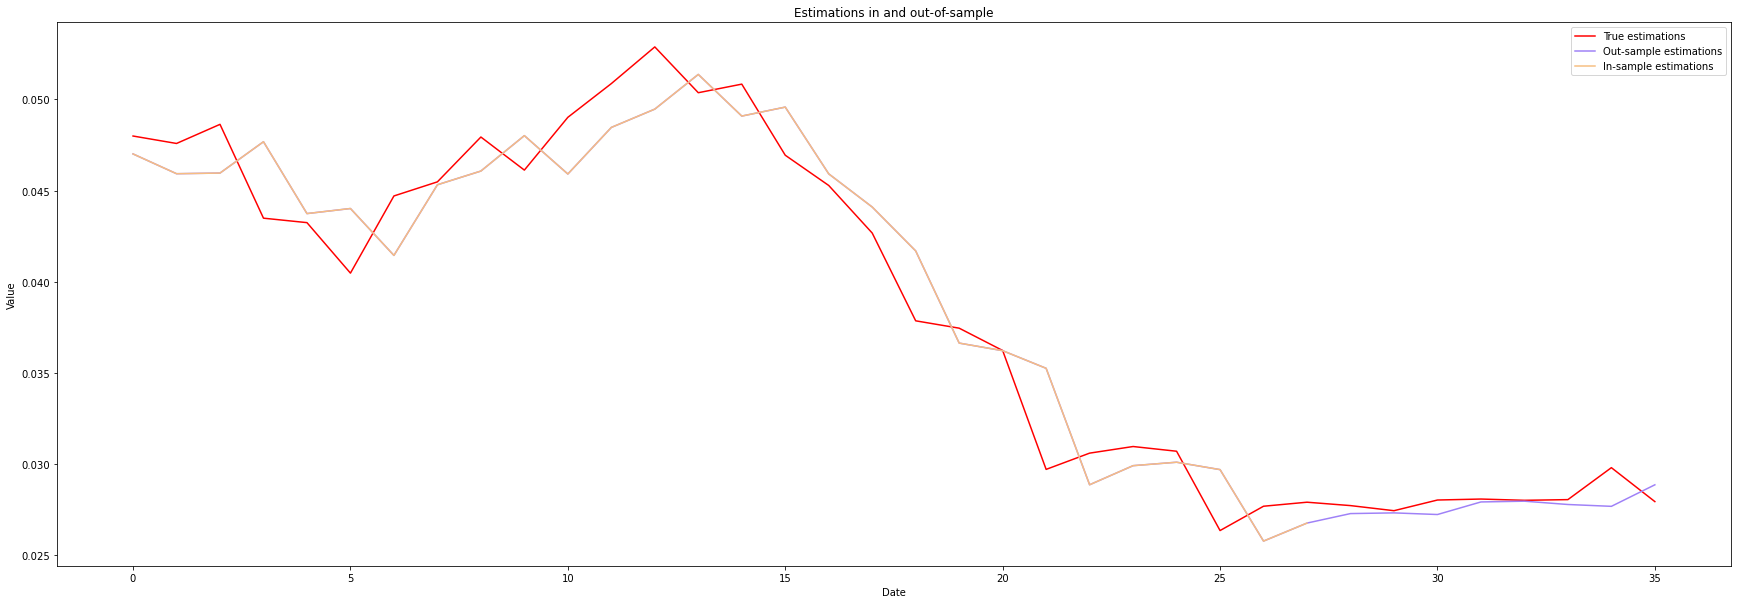

In [8]:
# plot the estimated values of the best model
model.get_plot(date=None, color1="red", color2="#9F81F7", color3="#F7BE81")

<div style="margin: 10px;">
    <h2 style="font-family: Arial">
        <font color="#0E1117">
            2. Generate random combinations of features by including the lag 2 of the Y feature
        </font>
    </h2>
</div>

In [9]:
model = FeatureSelection(
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test,
    scoring="U",
    n_iter=100,
    min_features=5,
    y_lag_select=["DR_lag_2"],
    random_state=42
)

In [10]:
# fit the model
model.fit()

LinearRegression(n_jobs=-1, normalize='deprecated')

In [11]:
# get the best model
model.get_params()

{'Model': 'DR_lag_3, DR_lag_1, IRLT_lag_2, HICP_lag_4, RGDP_lag_4, DR_lag_2',
 'MAE': 0.0006648137170552674,
 'MSE': 6.717282849109587e-07,
 'RMSE': 0.0008195903152862159,
 'UM': 0.08942021037378252,
 'US': 0.05727177114396357,
 'UC': 0.7338140287235194,
 'U1': 0.029116491942153593,
 'U': 0.014620490126447491}

In [12]:
# get all estimated models and associated scores
model.get_scores()

,Model,MAE,MSE,RMSE,UM,US,UC,U1,U
0,"DR_lag_3, DR_lag_1, IRLT_lag_2, HICP_lag_4, RG...",0.000665,6.717283e-07,0.000820,0.089420,0.057272,0.733814,0.029116,0.014620
1,"DR_lag_3, HICP_lag_4, DR_lag_4, RREP_lag_1, DR...",0.000870,9.514793e-07,0.000975,0.190922,0.000253,0.789838,0.034653,0.017459
2,"UNR_lag_4, RGDP, DR_lag_1, HICP_lag_4, RGDP_la...",0.000879,1.108807e-06,0.001053,0.383658,0.006937,0.568710,0.037408,0.018923
3,"DR_lag_3, DR_lag_1, HICP_lag_4, DR_lag_4, DR_l...",0.000878,1.190613e-06,0.001091,0.437081,0.002703,0.544203,0.038764,0.019137
4,"RGDP_lag_4, DR_lag_2, DR_lag_3, DR_lag_1",0.000915,1.158791e-06,0.001076,0.279041,0.029954,0.651391,0.038242,0.019314
...,...,...,...,...,...,...,...,...,...
95,"RGDP, IRLT_lag_2, HICP_lag_4, DR_lag_4, RGDP_l...",0.004151,3.537275e-05,0.005947,0.238741,0.548224,0.216399,0.211289,0.099780
96,"RGDP, IRLT_lag_2, RGDP_lag_2, IRLT_lag_3, RGDP...",0.004359,3.790045e-05,0.006156,0.021773,0.754240,0.226018,0.218708,0.106487
97,"RGDP, IRLT_lag_2, RGDP_lag_2, DR_lag_4, RGDP_l...",0.004749,3.815090e-05,0.006177,0.034384,0.769479,0.194031,0.219429,0.110652
98,"DR_lag_3, RGDP, RGDP_lag_2, DR_lag_4, RGDP_lag...",0.004010,4.851399e-05,0.006965,0.014654,0.812465,0.170536,0.247443,0.120189


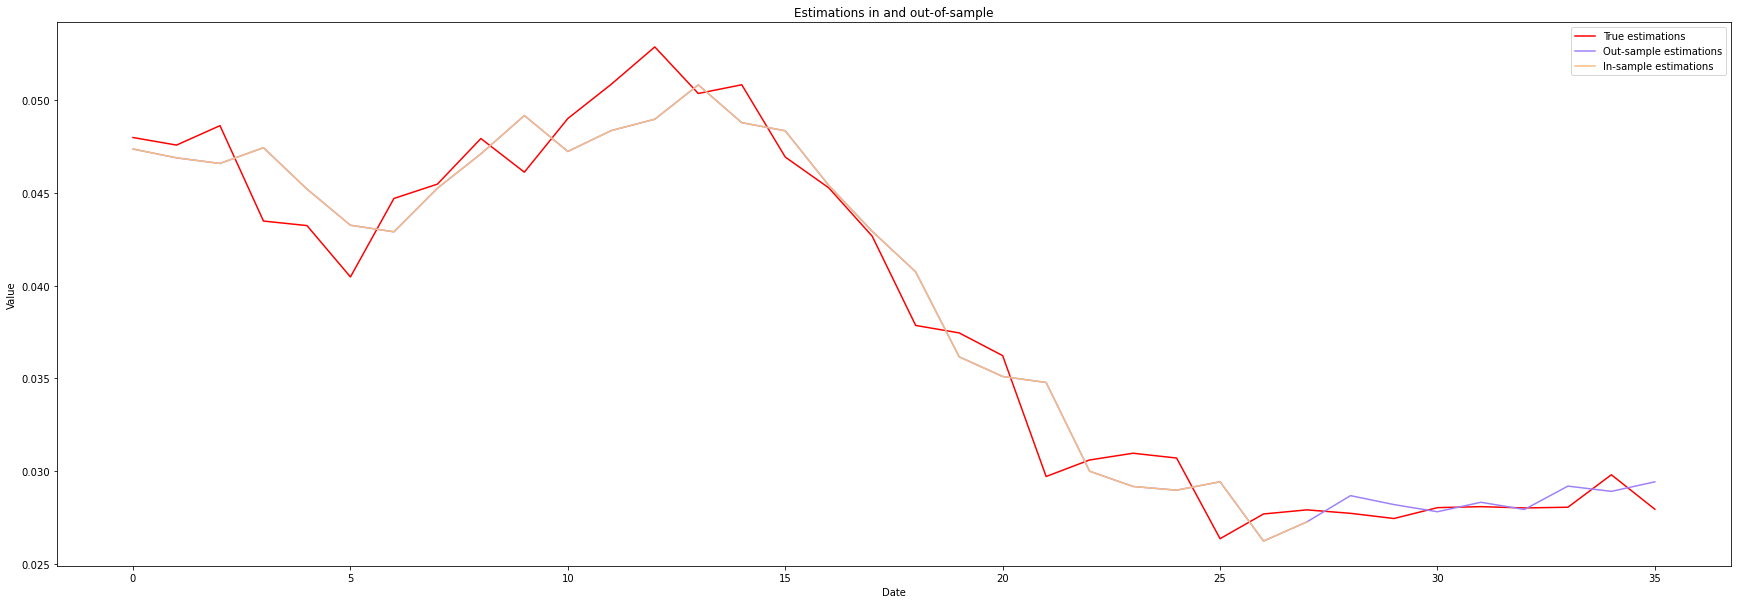

In [13]:
# plot the estimated values of the best model
model.get_plot(date=None, color1="red", color2="#9F81F7", color3="#F7BE81")